In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import special,optimize

In [2]:
zs = np.linspace(0.0,2.0,100)
zs

array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494

In [3]:
def ΗfunctionLCDM(z,y):
    omegam = y[0]
    h = y[1]
    E = (omegam*((1+z)**3)+(1-omegam))**0.5
    return 100*h*E

In [4]:
ΗfunctionLCDM(zs,[0.3,0.7])

array([ 70.        ,  70.64632224,  71.31253777,  71.99859939,
        72.70444537,  73.43000035,  74.17517616,  74.93987267,
        75.72397867,  76.52737267,  77.34992373,  78.19149228,
        79.05193091,  79.93108511,  80.82879402,  81.74489116,
        82.67920506,  83.63155994,  84.60177632,  85.5896716 ,
        86.59506062,  87.61775614,  88.65756938,  89.71431043,
        90.78778868,  91.8778132 ,  92.98419314,  94.106738  ,
        95.24525799,  96.39956426,  97.56946919,  98.7547866 ,
        99.95533193, 101.17092248, 102.40137751, 103.64651845,
       104.90616894, 106.18015505, 107.46830527, 108.77045066,
       110.08642487, 111.41606425, 112.75920783, 114.11569742,
       115.48537755, 116.86809558, 118.26370166, 119.67204869,
       121.09299242, 122.52639134, 123.97210671, 125.43000252,
       126.89994551, 128.38180506, 129.87545326, 131.38076476,
       132.89761686, 134.42588934, 135.96546455, 137.51622726,
       139.07806467, 140.65086636, 142.23452425, 143.82

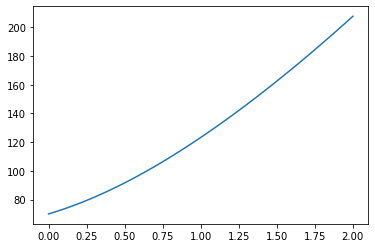

In [5]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))

In [15]:
def Ηfunctionexp1(z,y):
    '''
    f(Q) = Qexp(lmbd*Q_0/Q)
    '''
    Om_m0 = y[0]
    h = y[1]
    T_cmb = 2.7255
    Omr = Om_m0/(1. + 2.5e4 * Om_m0 * h**2. * (T_cmb/2.7)**(-4.))
    expr = (Om_m0 + Omr)/(-2*np.exp(0.5))
    a = (0.5 + special.lambertw(expr,k=0)).real
    H_0 = 100*h
    T_cmb = 2.7255
    Om_r = Om_m0/(1. + 2.5e4 * Om_m0* h**2. * (T_cmb/2.7)**(-4.))
    Og_mod = 31500. * (T_cmb/2.7)**(-4.)
    Om_l = 1. - Om_m0- Om_r
    x0E = (Om_m0*(1.+z)**3. + Om_r*(1.+z)**4. + Om_l)**0.5
    equation_E = lambda E: (E**2.- 2*a)* np.exp(a*1./E**2)- Om_m0*(1.+z)**3- Om_r*(1.+z)**4
    res = optimize.newton(equation_E, x0E) 
    return H_0*res

In [16]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunctionexp1(0,[0.3,0.7]))

70.0


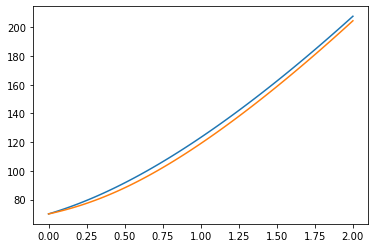

In [17]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunctionexp1(zs,[0.3,0.7]))

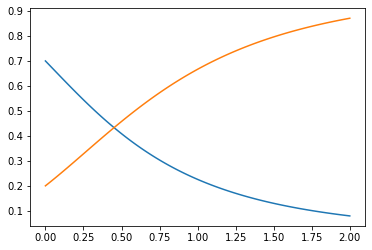

In [22]:
# fish plot for LCDM 
# \Omega_{\Lambda} = E^2 -Omega_{m0} (1+z)^3
omegam = 0.2
h = 0.6
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/ΗfunctionLCDM(zs,[omegam,h]))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((ΗfunctionLCDM(zs,[omegam,h])/(100*h))**2))
# intersection point(transition redshift), to the left accelarated, to the right disaccelerated 

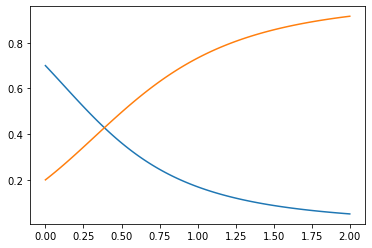

In [23]:
# fish plot for exp1 
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunctionexp1(zs,[omegam,h]))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunctionexp1(zs,[omegam,h])/(100*h))**2))
# intersection point, to the left accelarated, to the right disaccelerated 